# Multiple Objectives for Residential PV

## Set up.

### One only needs to execute the following line once, in order to make sure recent enough packages are installed.

In [1]:
#!pip install 'numpy>=1.17.2' 'pandas>=0.25.1'

### Import packages.

In [2]:
import os
import sys
sys.path.insert(0, os.path.abspath("../src"))

In [3]:
import numpy             as np
import matplotlib.pyplot as pl
import pandas            as pd
import seaborn           as sb

# The `tyche` package is located at <https://github.com/NREL/portfolio/tree/master/production-function/src/tyche/>.
import tyche             as ty

from copy            import deepcopy
from IPython.display import Image 

## Load data.

### The data are stored in a set of tab-separated value files in a folder.

In [4]:
designs = ty.Designs("data/pv_residential_simple")

In [5]:
investments = ty.Investments("data/pv_residential_simple")

### Compile the production and metric functions for each technology in the dataset.

In [6]:
designs.compile()

## Examine the data.

### The `functions` table specifies where the Python code for each technology resides.

In [7]:
designs.functions

,Style,Module,Capital,Fixed,Production,Metrics,Notes
Technology,,,,,,,
Residential PV,numpy,pv_residential_simple,capital_cost,fixed_cost,production,metrics,


Right now, only the style `numpy` is supported.

### The `indices` table defines the subscripts for variables.

In [8]:
designs.indices

Offset  \
Technology     Type    Index                 
Residential PV Capital BoS               2   
                       Inverter          1   
                       Module            0   
               Fixed   System            0   
               Input   NaN               0   
               Metric  GHG               2   
                       LCOE              0   
                       Labor             1   
               Output  Electricity       0   

                                                              Description  \
Technology     Type    Index                                                
Residential PV Capital BoS                              balance of system   
                       Inverter                          system inverters   
                       Module                               system module   
               Fixed   System                                whole system   
               Input   NaN                                      no inputs   
               Metric  GHG                              reduction in GHGs   
                       LCOE         reduction in levelized cost of energy   
                       Labor                increase in spending on wages   
               Output  Electricity                  electricity generated   

                                   Notes  
Technology     Type    Index              
Residential PV Capital BoS                
                       Inverter           
                       Module             
               Fixed   System             
               Input   NaN                
               Metric  GHG                
                       LCOE               
                       Labor              
               Output  Electricity

### The `designs` table contains the cost, input, efficiency, and price data for a scenario.

In [9]:
designs.designs

Value  \
Technology     Scenario             Variable          Index               
Residential PV 2015 Actual          Input             NaN             0   
                                    Input efficiency  NaN             1   
                                    Input price       NaN             0   
                                    Lifetime          BoS             1   
                                                      Inverter        1   
...                                                                 ...   
               Module Slow Progress Lifetime          Inverter        1   
                                                      Module          1   
                                    Output efficiency Electricity     1   
                                    Output price      Electricity     0   
                                    Scale             NaN             1   

                                                                             Units  \
Technology     Scenario             Variable          Index                          
Residential PV 2015 Actual          Input             NaN                        1   
                                    Input efficiency  NaN                        1   
                                    Input price       NaN                        1   
                                    Lifetime          BoS          system-lifetime   
                                                      Inverter     system-lifetime   
...                                                                            ...   
               Module Slow Progress Lifetime          Inverter     system-lifetime   
                                                      Module       system-lifetime   
                                    Output efficiency Electricity              W/W   
                                    Output price      Electricity            $/kWh   
                                    Scale             NaN            system/system   

                                                                                                             Notes  
Technology     Scenario             Variable          Index                                                         
Residential PV 2015 Actual          Input             NaN                                                no inputs  
                                    Input efficiency  NaN                                                no inputs  
                                    Input price       NaN                                                no inputs  
                                    Lifetime          BoS                                per-lifetime computations  
                                                      Inverter                           per-lifetime computations  
...                                                                                                            ...  
               Module Slow Progress Lifetime          Inverter                           per-lifetime computations  
                                                      Module                             per-lifetime computations  
                                    Output efficiency Electricity  see parameter table for individual efficiencies  
                                    Output price      Electricity                   not tracking electricity price  
                                    Scale             NaN                                               no scaling  

[90 rows x 3 columns]

### The `parameters` table contains additional techno-economic parameters for each technology.

In [10]:
designs.parameters

Offset  \
Technology     Scenario             Parameter                      
Residential PV 2015 Actual          Customer Acquisition      19   
                                    DC-to-AC Ratio            15   
                                    Direct Labor              17   
                                    Discount Rate              0   
                                    Hardware Capital          16   
...                                                          ...   
               Module Slow Progress Module Lifetime            4   
                                    Module O&M Fixed           7   
                                    Module Soiling Loss       10   
                                    Permitting                18   
                                    System Size                2   

                                                                                           Value  \
Technology     Scenario             Parameter                                                      
Residential PV 2015 Actual          Customer Acquisition     st.triang(0.5, loc=2000, scale=0.2)   
                                    DC-to-AC Ratio        st.triang(0.5, loc=1.4, scale=0.00014)   
                                    Direct Labor             st.triang(0.5, loc=2000, scale=0.2)   
                                    Discount Rate                                           0.07   
                                    Hardware Capital         st.triang(0.5, loc=80, scale=0.008)   
...                                                                                          ...   
               Module Slow Progress Module Lifetime              st.triang(0.5, loc=26, scale=1)   
                                    Module O&M Fixed           st.triang(0.5, loc=19, scale=0.5)   
                                    Module Soiling Loss   st.triang(0.5, loc=0.05, scale=10E-06)   
                                    Permitting               st.triang(0.5, loc=600, scale=0.06)   
                                    System Size                                               36   

                                                             Units Notes  
Technology     Scenario             Parameter                             
Residential PV 2015 Actual          Customer Acquisition  $/system   BCA  
                                    DC-to-AC Ratio               1   IDC  
                                    Direct Labor          $/system   BLR  
                                    Discount Rate           1/year    DR  
                                    Hardware Capital         $/m^2   BCC  
...                                                            ...   ...  
               Module Slow Progress Module Lifetime             yr   MLT  
                                    Module O&M Fixed        $/kWyr   MOM  
                                    Module Soiling Loss          1   MSL  
                                    Permitting            $/system   BPR  
                                    System Size                m^2   SSZ  

[210 rows x 4 columns]

### The `results` table specifies the units of measure for results of computations.

In [11]:
designs.results

Units Notes
Technology     Variable Index                           
Residential PV Cost     Cost              $/system      
               Metric   GHG          ΔgCO2e/system      
                        LCOE                Δ$/kWh      
                        Labor            Δ$/system      
               Output   Electricity            kWh

### The `tranches` table specifies multually exclusive possibilities for investments: only one `Tranch` may be selected for each `Category`.

In [12]:
investments.tranches

Amount Notes
Category     Tranche             Scenario                                   
BoS R&D      BoS High R&D        BoS Fast Progress            900000.0      
             BoS Low R&D         BoS Slow Progress            300000.0      
             BoS Medium R&D      BoS Moderate Progress        600000.0      
Inverter R&D Inverter High R&D   Inverter Fast Progress      3000000.0      
             Inverter Low R&D    Inverter Slow Progress      1000000.0      
             Inverter Medium R&D Inverter Moderate Progress  2000000.0      
Module R&D   Module High R&D     Module Fast Progress        4500000.0      
             Module Low R&D      Module Slow Progress        1500000.0      
             Module Medium R&D   Module Moderate Progress    3000000.0

### The `investments` table bundles a consistent set of tranches (one per category) into an overall investment.

In [13]:
investments.investments

Notes
Investment Category     Tranche                  
High R&D   BoS R&D      BoS High R&D             
           Inverter R&D Inverter High R&D        
           Module R&D   Module High R&D          
Low R&D    BoS R&D      BoS Low R&D              
           Inverter R&D Inverter Low R&D         
           Module R&D   Module Low R&D           
Medium R&D BoS R&D      BoS Medium R&D           
           Inverter R&D Inverter Medium R&D      
           Module R&D   Module Medium R&D

## Evaluate the scenarios in the dataset.

In [14]:
scenario_results = designs.evaluate_scenarios(sample_count=50)

In [15]:
scenario_results.xs(1, level="Sample", drop_level=False)

Value  \
Technology     Scenario                   Sample Variable Index                        
Residential PV 2015 Actual                1      Cost     Cost          19541.835826   
                                                 Metric   GHG              -0.001761   
                                                          LCOE             -0.000019   
                                                          Labor            -0.001281   
                                                 Output   Electricity  184107.032791   
               BoS Fast Progress          1      Cost     Cost          17524.525245   
                                                 Metric   GHG              -0.004254   
                                                          LCOE              0.010936   
                                                          Labor          -545.200985   
                                                 Output   Electricity  184101.481909   
               BoS Moderate Progress      1      Cost     Cost          17960.467902   
                                                 Metric   GHG              -0.001253   
                                                          LCOE              0.008571   
                                                          Labor          -331.852654   
                                                 Output   Electricity  184108.162865   
               BoS Slow Progress          1      Cost     Cost          19022.884313   
                                                 Metric   GHG               0.000327   
                                                          LCOE              0.002802   
                                                          Labor          -148.230849   
                                                 Output   Electricity  184111.682213   
               Inverter Fast Progress     1      Cost     Cost          18059.997438   
                                                 Metric   GHG               2.601021   
                                                          LCOE              0.011024   
                                                          Labor            -0.031111   
                                                 Output   Electricity  189903.145647   
               Inverter Moderate Progress 1      Cost     Cost          18713.047656   
                                                 Metric   GHG               2.537671   
                                                          LCOE              0.007512   
                                                          Labor            -0.034240   
                                                 Output   Electricity  189762.072909   
               Inverter Slow Progress     1      Cost     Cost          19224.862899   
                                                 Metric   GHG               2.435100   
                                                          LCOE              0.004693   
                                                          Labor             0.056486   
                                                 Output   Electricity  189533.659025   
               Module Fast Progress       1      Cost     Cost          18935.973204   
                                                 Metric   GHG              51.490235   
                                                          LCOE              0.042746   
                                                          Labor             0.013583   
                                                 Output   Electricity  298774.134685   
               Module Moderate Progress   1      Cost     Cost          18952.058689   
                                                 Metric   GHG              41.216046   
                                                          LCOE              0.037432   
                                                          Labor             0.029792   
                               

### Save results.

In [16]:
scenario_results.to_csv("output/pv_residential_simple/example-scenario.csv")

### Plot GHG metric.

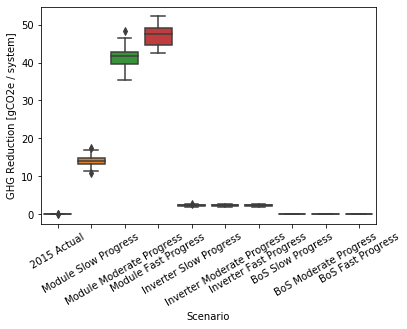

In [17]:
g = sb.boxplot(
    x="Scenario",
    y="Value",
    data=scenario_results.xs(
        ["Metric", "GHG"],
        level=["Variable", "Index"]
    ).reset_index()[["Scenario", "Value"]],
    order=[
        "2015 Actual"              ,
        "Module Slow Progress"      ,
        "Module Moderate Progress"  ,
        "Module Fast Progress"      ,
        "Inverter Slow Progress"    ,
        "Inverter Moderate Progress",
        "Inverter Fast Progress"    ,
        "BoS Slow Progress"         ,
        "BoS Moderate Progress"     ,
        "BoS Fast Progress"         ,
    ]
)
g.set(ylabel="GHG Reduction [gCO2e / system]")
g.set_xticklabels(g.get_xticklabels(), rotation=30);

### Plot LCOE metric.

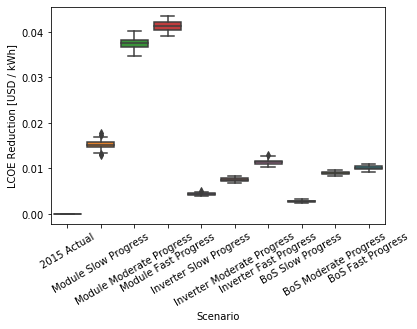

In [18]:
g = sb.boxplot(
    x="Scenario",
    y="Value",
    data=scenario_results.xs(
        ["Metric", "LCOE"],
        level=["Variable", "Index"]
    ).reset_index()[["Scenario", "Value"]],
    order=[
        "2015 Actual"              ,
        "Module Slow Progress"      ,
        "Module Moderate Progress"  ,
        "Module Fast Progress"      ,
        "Inverter Slow Progress"    ,
        "Inverter Moderate Progress",
        "Inverter Fast Progress"    ,
        "BoS Slow Progress"         ,
        "BoS Moderate Progress"     ,
        "BoS Fast Progress"         ,
    ]
)
g.set(ylabel="LCOE Reduction [USD / kWh]")
g.set_xticklabels(g.get_xticklabels(), rotation=30);

### Plot labor metric.

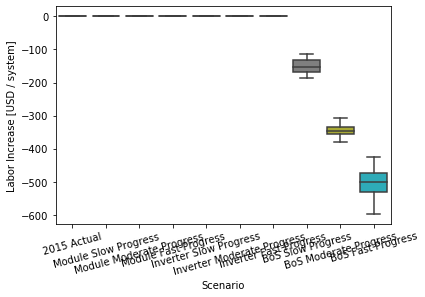

In [19]:
g = sb.boxplot(
    x="Scenario",
    y="Value",
    data=scenario_results.xs(
        ["Metric", "Labor"],
        level=["Variable", "Index"]
    ).reset_index()[["Scenario", "Value"]],
    order=[
        "2015 Actual"              ,
        "Module Slow Progress"      ,
        "Module Moderate Progress"  ,
        "Module Fast Progress"      ,
        "Inverter Slow Progress"    ,
        "Inverter Moderate Progress",
        "Inverter Fast Progress"    ,
        "BoS Slow Progress"         ,
        "BoS Moderate Progress"     ,
        "BoS Fast Progress"         ,
    ]
)
g.set(ylabel="Labor Increase [USD / system]")
g.set_xticklabels(g.get_xticklabels(), rotation=15);

## Evaluate the investments in the dataset.

In [20]:
investment_results = investments.evaluate_investments(designs, sample_count=50)

### Costs of investments.

In [21]:
investment_results.amounts

,Amount
Investment,
High R&D,8400000.0
Low R&D,2800000.0
Medium R&D,5600000.0


### Benefits of investments.

In [22]:
investment_results.metrics.xs(1, level="Sample", drop_level=False)

Value  \
Investment Category     Tranche             Scenario                   Sample Technology     Index               
High R&D   BoS R&D      BoS High R&D        BoS Fast Progress          1      Residential PV GHG      0.001646   
                                                                                             LCOE     0.009871   
                                                                                             Labor -484.675917   
Medium R&D BoS R&D      BoS Medium R&D      BoS Moderate Progress      1      Residential PV GHG     -0.005431   
                                                                                             LCOE     0.009181   
                                                                                             Labor -350.111301   
Low R&D    BoS R&D      BoS Low R&D         BoS Slow Progress          1      Residential PV GHG     -0.000623   
                                                                                             LCOE     0.002863   
                                                                                             Labor -165.967402   
High R&D   Inverter R&D Inverter High R&D   Inverter Fast Progress     1      Residential PV GHG      2.366737   
                                                                                             LCOE     0.011084   
                                                                                             Labor    0.034014   
Medium R&D Inverter R&D Inverter Medium R&D Inverter Moderate Progress 1      Residential PV GHG      2.385654   
                                                                                             LCOE     0.007551   
                                                                                             Labor    0.016533   
Low R&D    Inverter R&D Inverter Low R&D    Inverter Slow Progress     1      Residential PV GHG      2.562178   
                                                                                             LCOE     0.004598   
                                                                                             Labor    0.081408   
High R&D   Module R&D   Module High R&D     Module Fast Progress       1      Residential PV GHG     50.680545   
                                                                                             LCOE     0.043544   
                                                                                             Labor   -0.014162   
Medium R&D Module R&D   Module Medium R&D   Module Moderate Progress   1      Residential PV GHG     41.065128   
                                                                                             LCOE     0.037053   
                                                                                             Labor   -0.010921   
Low R&D    Module R&D   Module Low R&D      Module Slow Progress       1      Residential PV GHG     12.916316   
                                                                                             LCOE     0.013848   
                                                                                             Labor    0.057653   

                                                                                                            Units  
Investment Category     Tranche             Scenario                   Sample Technology     Index                 
High R&D   BoS R&D      BoS High R&D        BoS Fast Progress          1      Residential PV GHG    ΔgCO2e/system  
                                                                                             LCOE          Δ$/kWh  
                                                                                             Labor      Δ$/system  
Medium R&D BoS R&D      BoS Medium R&D      BoS Moderate Progress      1      Residential PV GHG    ΔgCO2e/system  
                                                                                             LCOE     

In [23]:
investment_results.summary.xs(1, level="Sample", drop_level=False)

Value          Units
Investment Sample Index                           
High R&D   1      GHG     53.048928  ΔgCO2e/system
                  LCOE     0.064500         Δ$/kWh
                  Labor -484.656066      Δ$/system
Medium R&D 1      GHG     43.445350  ΔgCO2e/system
                  LCOE     0.053785         Δ$/kWh
                  Labor -350.105690      Δ$/system
Low R&D    1      GHG     15.477872  ΔgCO2e/system
                  LCOE     0.021309         Δ$/kWh
                  Labor -165.828341      Δ$/system

### Save results.

In [24]:
investment_results.amounts.to_csv("output/pv_residential_simple/example-investment-amounts.csv")

In [25]:
investment_results.metrics.to_csv("output/pv_residential_simple/example-investment-metrics.csv")

### Plot GHG metric.

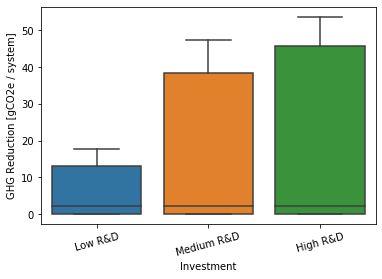

In [26]:
g = sb.boxplot(
    x="Investment",
    y="Value",
    data=investment_results.metrics.xs(
        "GHG",
        level="Index"
    ).reset_index()[["Investment", "Value"]],
    order=[
        "Low R&D"   ,
        "Medium R&D",
        "High R&D"  ,
    ]
)
g.set(ylabel="GHG Reduction [gCO2e / system]")
g.set_xticklabels(g.get_xticklabels(), rotation=15);

### Plot LCOE metric.

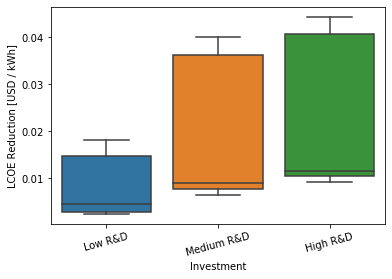

In [27]:
g = sb.boxplot(
    x="Investment",
    y="Value",
    data=investment_results.metrics.xs(
        "LCOE",
        level="Index"
    ).reset_index()[["Investment", "Value"]],
    order=[
        "Low R&D"   ,
        "Medium R&D",
        "High R&D"  ,
    ]
)
g.set(ylabel="LCOE Reduction [USD / kWh]")
g.set_xticklabels(g.get_xticklabels(), rotation=15);

### Plot labor metric.

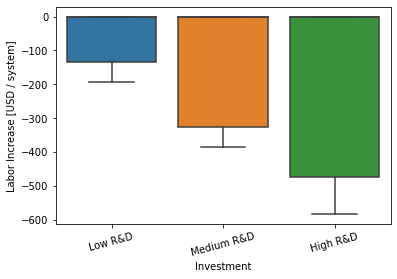

In [28]:
g = sb.boxplot(
    x="Investment",
    y="Value",
    data=investment_results.metrics.xs(
        "Labor",
        level="Index"
    ).reset_index()[["Investment", "Value"]],
    order=[
        "Low R&D"   ,
        "Medium R&D",
        "High R&D"  ,
    ]
)
g.set(ylabel="Labor Increase [USD / system]")
g.set_xticklabels(g.get_xticklabels(), rotation=15);

## Multi-objective decision analysis.

### Compute costs and metrics for tranches.

Tranches are atomic units for building investment portfolios. Evaluate all of the tranches, so we can assemble them into investments (portfolios).

In [29]:
tranche_results = investments.evaluate_tranches(designs, sample_count=50)

Display the cost of each tranche.

In [30]:
tranche_results.amounts

Amount
Category     Tranche                       
BoS R&D      BoS High R&D          900000.0
             BoS Low R&D           300000.0
             BoS Medium R&D        600000.0
Inverter R&D Inverter High R&D    3000000.0
             Inverter Low R&D     1000000.0
             Inverter Medium R&D  2000000.0
Module R&D   Module High R&D      4500000.0
             Module Low R&D       1500000.0
             Module Medium R&D    3000000.0

Display the metrics for each tranche.

In [31]:
tranche_results.summary

Value          Units
Category   Tranche        Sample Index                           
BoS R&D    BoS High R&D   1      GHG     -0.004062  ΔgCO2e/system
                                 LCOE     0.009967         Δ$/kWh
                                 Labor -490.859314      Δ$/system
                          2      GHG      0.001960  ΔgCO2e/system
                                 LCOE     0.010154         Δ$/kWh
...                                            ...            ...
Module R&D Module Low R&D 49     LCOE     0.016198         Δ$/kWh
                                 Labor    0.039788      Δ$/system
                          50     GHG     13.654483  ΔgCO2e/system
                                 LCOE     0.014910         Δ$/kWh
                                 Labor   -0.015539      Δ$/system

[1350 rows x 2 columns]

Save the results.

In [32]:
tranche_results.amounts.to_csv("output/pv_residential_simple/example-tranche-amounts.csv")
tranche_results.summary.to_csv("output/pv_residential_simple/example-tranche-summary.csv")

### Fit a response surface to the results.

The response surface interpolates between the discrete set of cases provided in the expert elicitation. This allows us to study funding levels intermediate between those scenarios.

In [33]:
evaluator = ty.Evaluator(investments.tranches, tranche_results.summary)

Here are the categories of investment and the maximum amount that could be invested in each:

In [34]:
evaluator.max_amount

,Amount
Category,
BoS R&D,900000.0
Inverter R&D,3000000.0
Module R&D,4500000.0


Here are the metrics and their units of measure:

In [35]:
evaluator.units

,Units
Index,
GHG,ΔgCO2e/system
LCOE,Δ$/kWh
Labor,Δ$/system


#### Example interpolation.

Let's evaluate the case where each category is invested in at half of its maximum amount.

In [36]:
example_investments = evaluator.max_amount / 2
example_investments

,Amount
Category,
BoS R&D,450000.0
Inverter R&D,1500000.0
Module R&D,2250000.0


In [37]:
evaluator.evaluate(example_investments)

Category    Index  Sample
BoS R&D     GHG    1         -0.0010586097518157094
                   2          7.493162517135921e-05
                   3           0.001253893601450784
                   4           -0.00398626797827717
                   5          -0.005572343870333896
                                      ...          
Module R&D  Labor  46          0.014371009324918305
                   47          0.011128728287076228
                   48         0.0039832773605894545
                   49          0.006026680267950724
                   50          0.028844695933457842
Name: Value, Length: 450, dtype: object

Let's evaluate the mean instead of outputing the whole distribution.

In [38]:
evaluator.evaluate_statistic(example_investments, np.mean)

Index
GHG       30.156830
LCOE       0.038160
Labor   -246.843027
Name: Value, dtype: float64

Here is the standard deviation:

In [39]:
evaluator.evaluate_statistic(example_investments, np.std)

Index
GHG       1.410956
LCOE      0.000850
Labor    16.070395
Name: Value, dtype: float64

A risk-averse decision maker might be interested in the 10% percentile:

In [40]:
evaluator.evaluate_statistic(example_investments, lambda x: np.quantile(x, 0.1))

Index
GHG       28.573627
LCOE       0.037140
Labor   -268.059699
Name: Value, dtype: float64

### ε-Constraint multiobjective optimization

In [41]:
optimizer = ty.EpsilonConstraintOptimizer(evaluator)

In order to meaningfully map the decision space, we need to know the maximum values for each of the metrics.

In [42]:
metric_max = optimizer.max_metrics()
metric_max

GHG      49.429976
LCOE      0.062818
Labor     0.049555
Name: Value, dtype: float64

#### Example optimization.

Limit spending to $3M.

In [43]:
investment_max = 3e6

Require that the GHG reduction be at least 40 gCO2e/system and that the Labor wages not decrease.

In [44]:
metric_min = pd.Series([40, 0], name = "Value", index = ["GHG", "Labor"])
metric_min

GHG      40
Labor     0
Name: Value, dtype: int64

Compute the ε-constrained maximum for the LCOE.

In [45]:
optimum = optimizer.maximize(
    "LCOE"                       ,
    total_amount = investment_max,
    min_metric   = metric_min    ,
    statistic    = np.mean       ,
)
optimum.exit_message

'Optimization terminated successfully.'

Here are the optimal spending levels:

In [46]:
np.round(optimum.amounts)

Category
BoS R&D               0.0
Inverter R&D          0.0
Module R&D      3000000.0
Name: Amount, dtype: float64

Here are the three metrics at that optimum:

In [47]:
optimum.metrics

Index
GHG      41.627691
LCOE      0.037566
Labor     0.028691
Name: Value, dtype: float64

*Thus, by putting all of the investment into Module R&D, we can expected to achieve a mean 3.75 ¢/kWh reduction in LCOE under the GHG and Labor constraints.*

It turns out that there is no solution for these constraints if we evaluate the 10th percentile of the metrics, for a risk-averse decision maker.

In [48]:
optimum = optimizer.maximize(
    "LCOE"                       ,
    total_amount = investment_max,
    min_metric   = metric_min    ,
    statistic    = lambda x: np.quantile(x, 0.1),
)
optimum.exit_message

'Iteration limit exceeded'

Let's try again, but with a less stringent set of constraints, only constraining GHG somewhat  but not Labor at all.

In [49]:
optimum = optimizer.maximize(
    "LCOE"                                                         ,
    total_amount = investment_max                                  ,
    min_metric   = pd.Series([30], name = "Value", index = ["GHG"]),
    statistic    = lambda x: np.quantile(x, 0.1)                   ,
)
optimum.exit_message

'Optimization terminated successfully.'

In [50]:
np.round(optimum.amounts)

Category
BoS R&D               0.0
Inverter R&D          0.0
Module R&D      3000000.0
Name: Amount, dtype: float64

In [51]:
optimum.metrics

Index
GHG      39.046988
LCOE      0.036463
Labor    -0.019725
Name: Value, dtype: float64

### Pareto surfaces.

##### Metrics constrained by total investment.

In [52]:
pareto_amounts = None
for investment_max in np.arange(1e6, 9e6, 0.5e6):
    metrics = optimizer.max_metrics(total_amount = investment_max)
    pareto_amounts = pd.DataFrame(
        [metrics.values]                                         ,
        columns = metrics.index.values                           ,
        index   = pd.Index([investment_max / 1e6], name = "Investment [M$]"),
    ).append(pareto_amounts)
pareto_amounts

,GHG,LCOE,Labor
Investment [M$],,,
8.5,49.429976,0.062818,0.049555
8.0,49.429976,0.061848,0.049555
7.5,49.429976,0.060635,0.049555
7.0,49.429976,0.059423,0.049555
6.5,49.429976,0.057592,0.049560
6.0,49.426992,0.055608,0.049545
5.5,49.424007,0.053976,0.049104
5.0,48.278589,0.052171,0.048930
4.5,47.133172,0.050431,0.047878


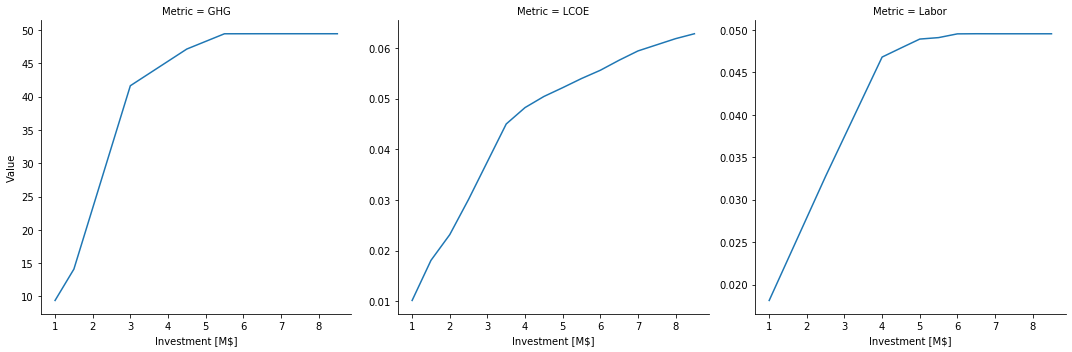

In [53]:
sb.relplot(
    x         = "Investment [M$]",
    y         = "Value"          ,
    col       = "Metric"         ,
    kind      = "line"           ,
    facet_kws = {'sharey': False},
    data      = pareto_amounts.reset_index().melt(id_vars = "Investment [M$]", var_name = "Metric", value_name = "Value")
)

*We see that the LCOE metric saturates more slowly than the GHG and Labor ones.*

##### GHG vs LCOE, constrained by total investment.

In [54]:
investment_max = 3
pareto_ghg_lcoe = None
for lcoe_min in 0.95 * np.arange(0.5, 0.9, 0.05) * pareto_amounts.loc[investment_max, "LCOE"]:
    optimum = optimizer.maximize(
        "GHG",
        max_amount   = pd.Series([0.9e6, 3.0e6, 1.0e6], name = "Amount", index = ["BoS R&D", "Inverter R&D", "Module R&D"]),
        total_amount = investment_max * 1e6                                 ,
        min_metric   = pd.Series([lcoe_min], name = "Value", index = ["LCOE"]),
    )
    pareto_ghg_lcoe = pd.DataFrame(
        [[investment_max, lcoe_min, optimum.metrics["LCOE"], optimum.metrics["GHG"], optimum.exit_message]],
        columns = ["Investment [M$]", "LCOE (min)", "LCOE", "GHG", "Result"]                               ,
    ).append(pareto_ghg_lcoe)
pareto_ghg_lcoe = pareto_ghg_lcoe.set_index(["Investment [M$]", "LCOE (min)"])
pareto_ghg_lcoe

LCOE        GHG  \
Investment [M$] LCOE (min)                        
3               0.030337    0.025037  11.691901   
                0.028553    0.025037  11.691901   
                0.026768    0.025037  11.691901   
                0.024983    0.024983  11.692188   
                0.023199    0.023199  11.693916   
                0.021414    0.021414  11.694230   
                0.019630    0.019630  11.694544   
                0.017845    0.017845  11.699478   

                                                                    Result  
Investment [M$] LCOE (min)                                                  
3               0.030337    Positive directional derivative for linesearch  
                0.028553    Positive directional derivative for linesearch  
                0.026768    Positive directional derivative for linesearch  
                0.024983             Optimization terminated successfully.  
                0.023199             Optimization terminated successfully.  
                0.021414             Optimization terminated successfully.  
                0.019630             Optimization terminated successfully.  
                0.017845             Optimization terminated successfully.

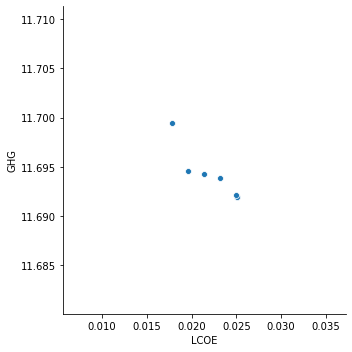

In [56]:
sb.relplot(
    x = "LCOE",
    y = "GHG",
    kind = "scatter",
    data = pareto_ghg_lcoe#[pareto_ghg_lcoe.Result == "Optimization terminated successfully."]
)

*The three types of investment are too decoupled to make an interesting pareto frontier, and we also need a better solver if we want to push to lower right.*

## Run the interactive explorer for the decision space.

<font color="red">Make sure the the `tk` package is installed on your machine.</font> Here is the Anaconda link: https://anaconda.org/anaconda/tk.

In [60]:
w = ty.DecisionWindow(evaluator)
w.mainloop()

A new window should open that looks like the image below. Moving the sliders will cause a recomputation of the boxplots.

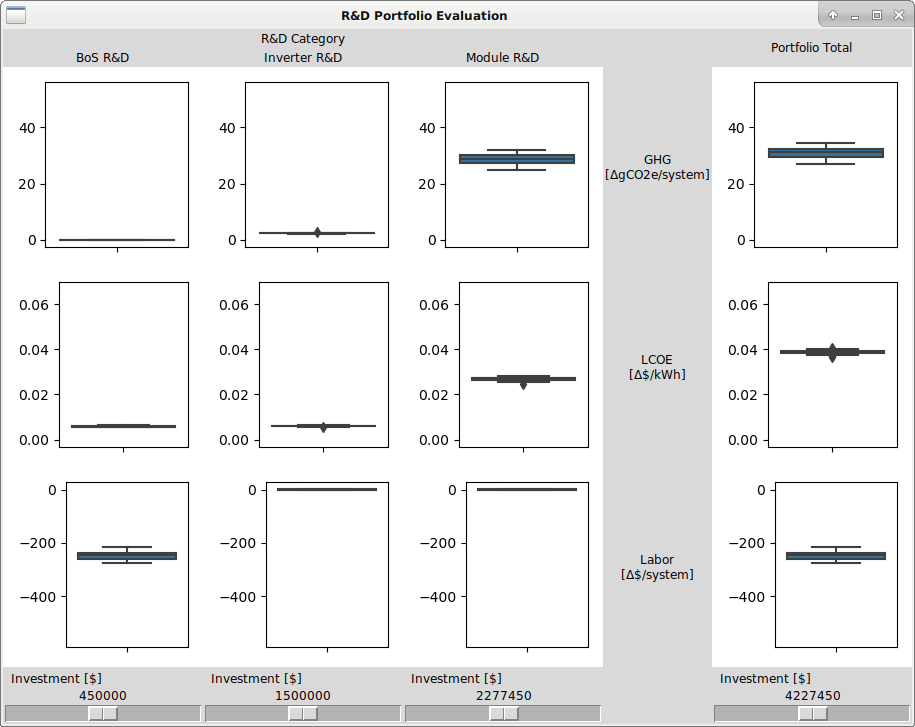

In [61]:
Image("pv_residential_simple_gui.png")